In [2]:
import pandas as pd
from forex_python.converter import CurrencyRates
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
df = pd.read_csv('task2.csv')

df = df.drop_duplicates()

df = df.dropna()

print(df.head())

   Work_Year Experience_Level Employment_Type                  Job_Title  \
0       2024     Senior-Level       Full-Time                AI Engineer   
1       2024     Senior-Level       Full-Time  Machine Learning Engineer   
2       2024     Senior-Level       Full-Time  Machine Learning Engineer   
3       2024     Senior-Level       Full-Time  Machine Learning Engineer   
4       2024     Senior-Level       Full-Time  Machine Learning Engineer   

   Salary Salary_Currency  Remote_Ratio Company_Size  
0   90000             USD             0        Large  
1  180500             USD             0       Medium  
2   96200             USD             0       Medium  
3  235000             USD             0       Medium  
4  175000             USD             0       Medium  


In [4]:
currency_counts = df['Salary_Currency'].value_counts()
print(currency_counts)

valid_currencies = currency_counts[currency_counts >= 10].index
df_filtered = df[df['Salary_Currency'].isin(valid_currencies)]

print(df_filtered['Salary_Currency'].value_counts())

Salary_Currency
USD    7499
GBP     410
EUR     339
INR      52
CAD      48
AUD      12
PLN       7
CHF       6
SGD       6
JPY       4
BRL       4
DKK       3
HUF       3
TRY       3
NOK       2
THB       2
ZAR       1
HKD       1
ILS       1
PHP       1
NZD       1
MXN       1
CLP       1
Name: count, dtype: int64
Salary_Currency
USD    7499
GBP     410
EUR     339
INR      52
CAD      48
AUD      12
Name: count, dtype: int64


In [5]:
currencies = df_filtered['Salary_Currency'].unique()
conversion_rates = {}

c = CurrencyRates()

for currency in currencies:
    try:
        conversion_rates[currency] = c.get_rate(currency, 'USD', datetime(2023, 1, 1))
    except Exception as e:
        print(f"Error fetching conversion rate for {currency}: {e}")

def convert_to_usd(row):
    amount = row['Salary']
    currency = row['Salary_Currency']
    try:
        return amount * conversion_rates[currency]
    except KeyError:
        print(f"Conversion rate for {currency} not found.")
        return None

df_filtered['Salary_in_USD'] = df_filtered.apply(convert_to_usd, axis=1)

df_filtered = df_filtered.dropna(subset=['Salary_in_USD'])

print(df_filtered.head())

   Work_Year Experience_Level Employment_Type                  Job_Title  \
0       2024     Senior-Level       Full-Time                AI Engineer   
1       2024     Senior-Level       Full-Time  Machine Learning Engineer   
2       2024     Senior-Level       Full-Time  Machine Learning Engineer   
3       2024     Senior-Level       Full-Time  Machine Learning Engineer   
4       2024     Senior-Level       Full-Time  Machine Learning Engineer   

   Salary Salary_Currency  Remote_Ratio Company_Size  Salary_in_USD  
0   90000             USD             0        Large        90000.0  
1  180500             USD             0       Medium       180500.0  
2   96200             USD             0       Medium        96200.0  
3  235000             USD             0       Medium       235000.0  
4  175000             USD             0       Medium       175000.0  


C:\Users\HP\AppData\Local\Temp\ipykernel_7696\2131649218.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Salary_in_USD'] = df_filtered.apply(convert_to_usd, axis=1)


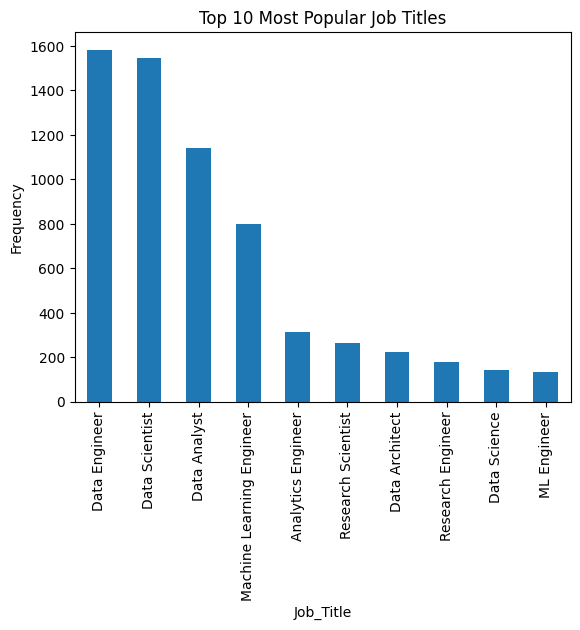

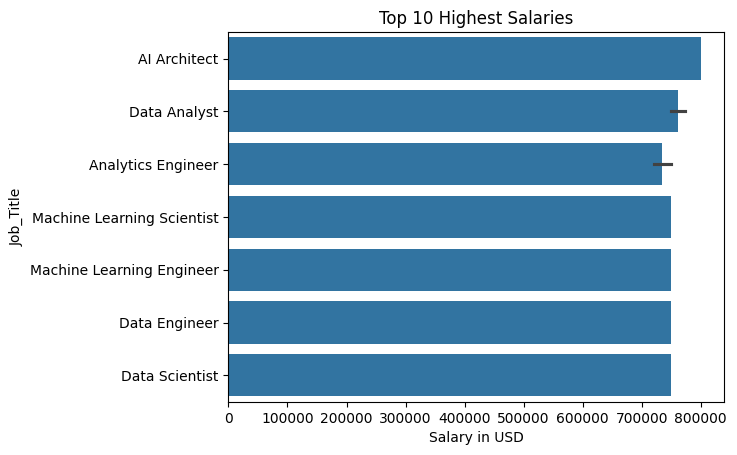

In [6]:
top_titles = df_filtered['Job_Title'].value_counts().head(10)
top_titles.plot(kind='bar')
plt.title('Top 10 Most Popular Job Titles')
plt.ylabel('Frequency')
plt.show()

top_salaries = df_filtered.nlargest(10, 'Salary_in_USD')
sns.barplot(x='Salary_in_USD', y='Job_Title', data=top_salaries)
plt.title('Top 10 Highest Salaries')
plt.xlabel('Salary in USD')
plt.show()

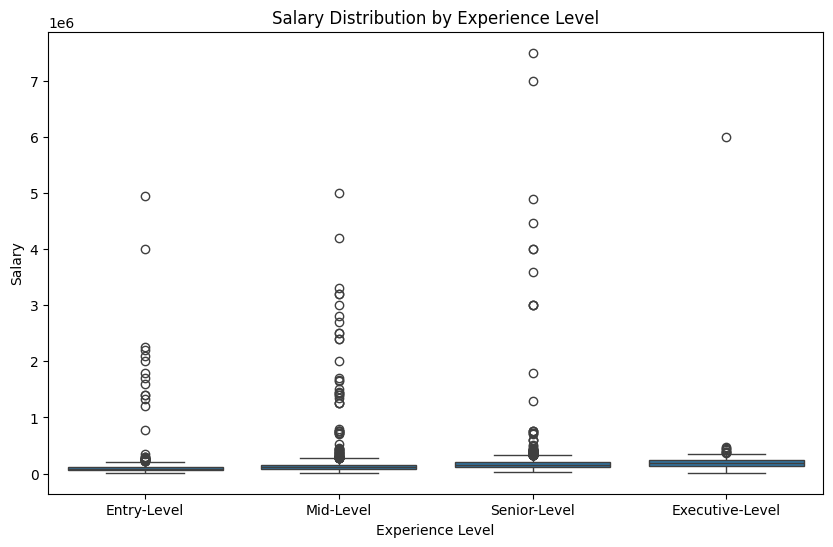

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Experience_Level', y='Salary', data=df_filtered, order=['Entry-Level', 'Mid-Level', 'Senior-Level', 'Executive-Level'])
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()

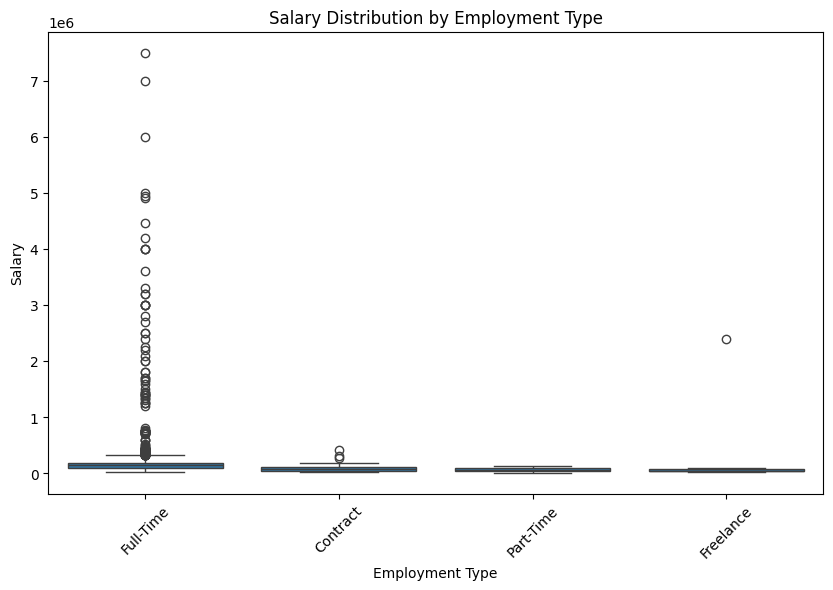

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Employment_Type', y='Salary', data=df_filtered)
plt.title('Salary Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

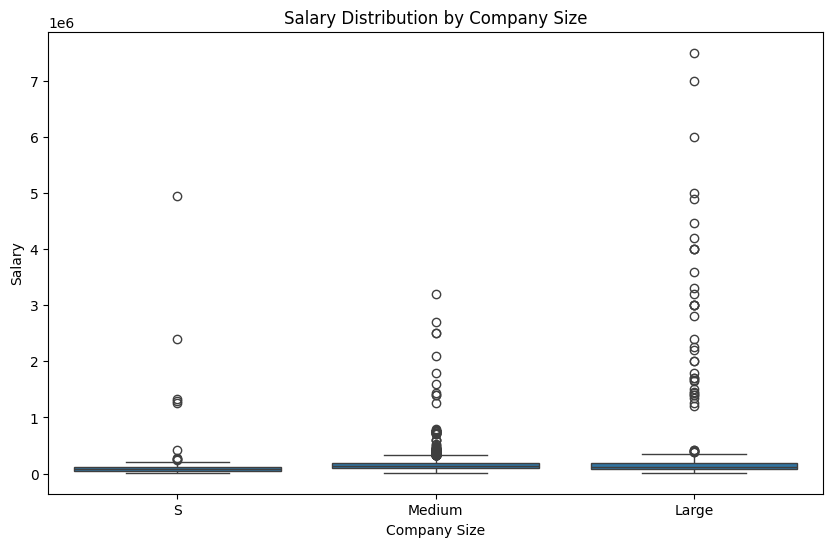

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Company_Size', y='Salary', data=df_filtered, order=['S', 'Medium', 'Large'])
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary')
plt.show()

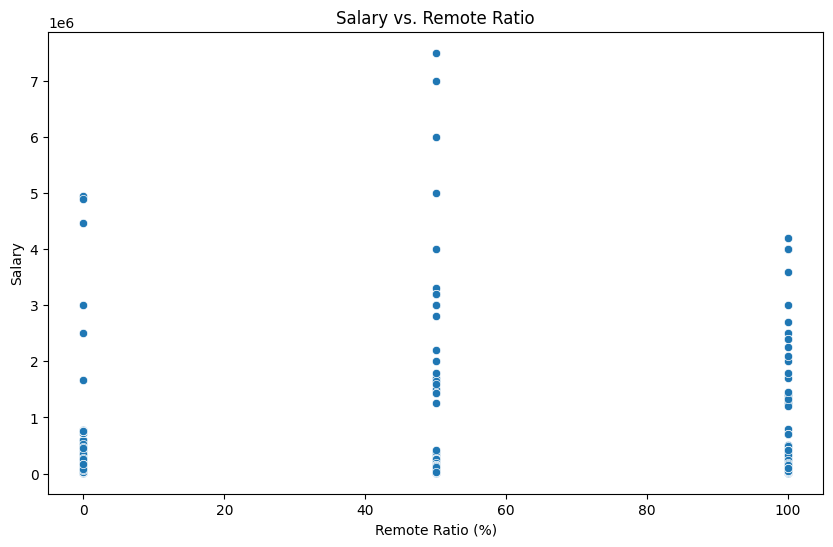

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Remote_Ratio', y='Salary', data=df_filtered)
plt.title('Salary vs. Remote Ratio')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Salary')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_24220\1628176802.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Work_Year', y='Salary_in_USD', data=df_filtered, estimator='mean', ci=None, markers=True)


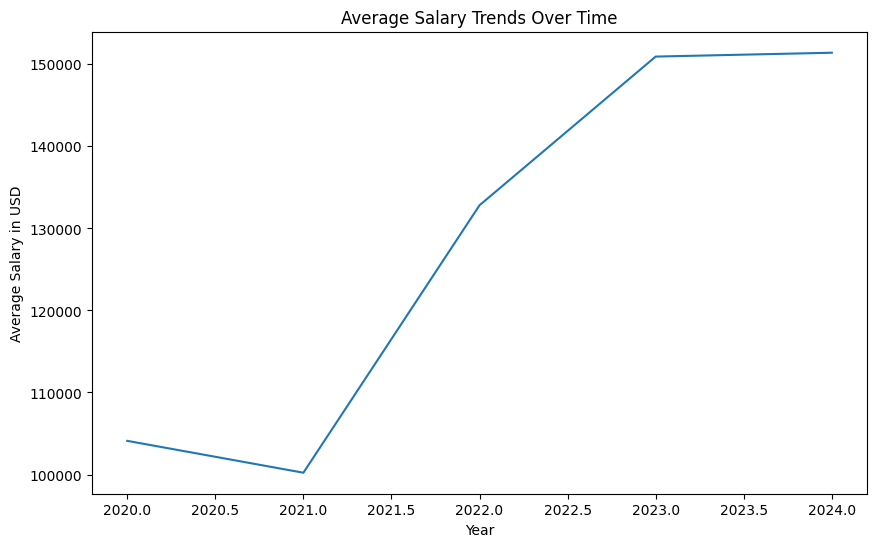

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Work_Year', y='Salary_in_USD', data=df_filtered, estimator='mean', ci=None, markers=True)
plt.title('Average Salary Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Average Salary in USD')
plt.show()

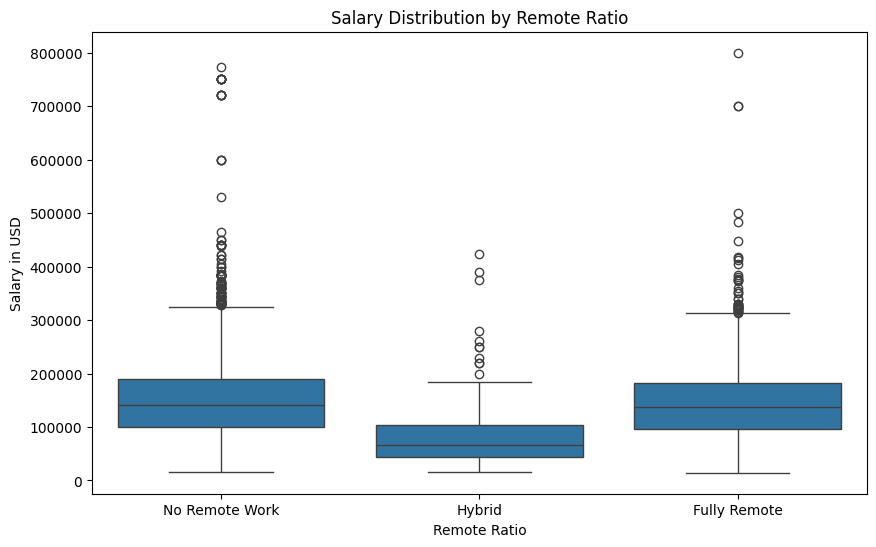

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Remote_Ratio', y='Salary_in_USD', data=df_filtered)
plt.title('Salary Distribution by Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD')
plt.xticks(ticks=[0, 1, 2], labels=['No Remote Work', 'Hybrid', 'Fully Remote'])
plt.show()

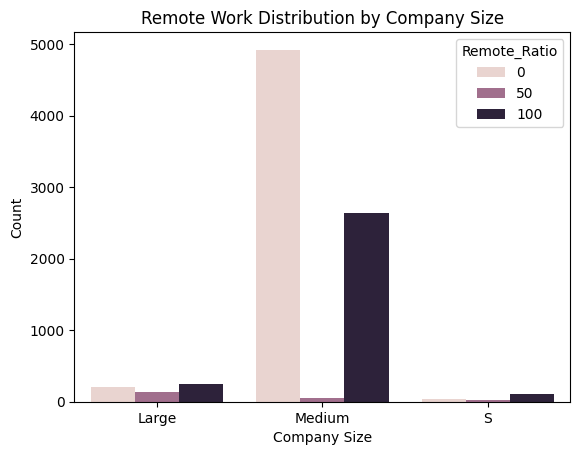

In [12]:
sns.countplot(x='Company_Size', hue='Remote_Ratio', data=df_filtered)
plt.title('Remote Work Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.show()